<a href="https://colab.research.google.com/github/Gabriel-Rangel/AnaliseExploratoria-DIO-comPandas/blob/main/Analise_Exploratoria_DIO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Criando DataFrame
df = pd.read_excel("/content/drive/MyDrive/DIO-ETL/AdventureWorks.xlsx")

In [5]:
# Visualizando cabeçalho
df.head(5)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [6]:
# Visualizando formato (linhasxcoluna)
df.shape

(904, 16)

In [7]:
# Visualizando tipo de dados 
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [9]:
# Verificando se a valores nulos
df.isnull().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
dtype: int64

In [13]:
# O dataset representa quantos anos ?
df["Data Venda"].dt.year.unique()


array([2008, 2009])

In [17]:
# Qual foi a receita total dos dois anos ?
receita_total = round(df["Valor Venda"].sum(), 2)
receita_total

5984606.14

In [18]:
# Qual foi o lucro total dos dois anos ?
custo_total = round((df["Custo Unitário"] * df["Quantidade"]).sum(), 2)
lucro_total = receita_total - custo_total
lucro_total 

3497823.09

In [25]:
# Qual a média para despache das vendas de cada marca
df["Tempo Envio"] = (df["Data Envio"] - df["Data Venda"]).dt.days
df["Tempo Envio"].astype(int)
df.groupby("Marca")["Tempo Envio"].mean()

Marca
Adventure Works    8.663866
Contoso            8.470930
Fabrikam           8.510121
Name: Tempo Envio, dtype: float64

In [31]:
# E o lucro por marca ?

# 1. primeiro criando uma coluna lucro 
df["Lucro"] = df["Valor Venda"] - (df["Custo Unitário"] * df["Quantidade"])

# 2. agora podemos usar o groupby
round(df.groupby("Marca")["Lucro"].sum(), 2)


Marca
Adventure Works     712036.24
Contoso             194674.95
Fabrikam           2591111.90
Name: Lucro, dtype: float64

In [39]:
# Não seria interessante saber o lucro total por ano e lucro marca/ano ?

# 1. Vamos criar uma coluna ano
df["Ano"] = df["Data Venda"].dt.year

# 2. agora podemos usar o groupby por anop
round(df.groupby("Ano")["Lucro"].sum(), 2)

Ano
2008    1920077.71
2009    1577745.38
Name: Lucro, dtype: float64

In [40]:
# Agora o groupby por ano e marca
round(df.groupby(["Ano", "Marca"])["Lucro"].sum(), 2)

Ano   Marca          
2008  Adventure Works     306641.16
      Contoso              56416.00
      Fabrikam           1557020.55
2009  Adventure Works     405395.08
      Contoso             138258.95
      Fabrikam           1034091.35
Name: Lucro, dtype: float64

In [42]:
# Agora vamos transformar o resultado da última celula em próprio df

df_sumarizado = round(df.groupby(["Ano", "Marca"])["Lucro"].sum(), 2).reset_index()
df_sumarizado
# Bastou resetar o index

,Ano,Marca,Lucro
0,2008,Adventure Works,306641.16
1,2008,Contoso,56416.00
2,2008,Fabrikam,1557020.55
3,2009,Adventure Works,405395.08
4,2009,Contoso,138258.95
5,2009,Fabrikam,1034091.35


In [43]:
# Quais são os produtos mais vendidos ?
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=False)

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

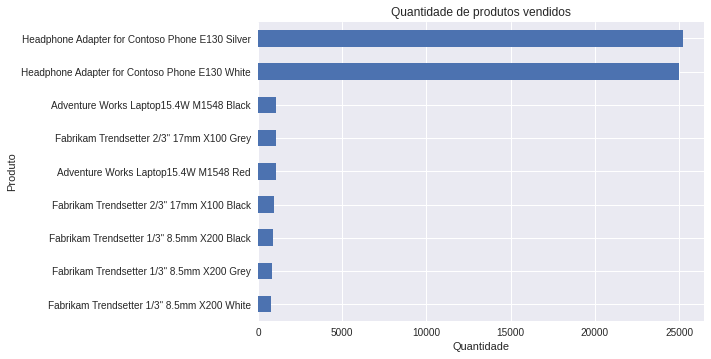

In [50]:
# Gráfico dos produtos vendidos

df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=True).plot.barh(title="Quantidade de produtos vendidos")
plt.xlabel("Quantidade")
plt.ylabel("Produto");

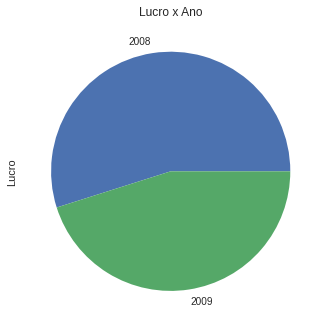

In [51]:
# Gráfico do Lucro x Ano
df.groupby("Ano")["Lucro"].sum().plot.pie(title="Lucro x Ano");

In [ ]:
#Selecionando apenas as vendas de 2009
df_2009 = df[df["Data Venda"].dt.year == 2009]

In [ ]:
df_2009.groupby(df_2009["Data Venda"].dt.month)["lucro"].sum().plot(title="Lucro x Mês")
plt.xlabel("Mês")
plt.ylabel("Lucro");

In [ ]:
df_2009.groupby("Classe")["lucro"].sum().plot.bar(title="Lucro x Classe")
plt.xlabel("Classe")
plt.ylabel("Lucro")
plt.xticks(rotation='horizontal');

In [ ]:
df["Tempo_envio"].describe()

In [ ]:
#Gráfico de Boxplot
plt.boxplot(df["Tempo_envio"]);

In [ ]:
#Histograma
plt.hist(df["Tempo_envio"]);

In [ ]:
#Tempo mínimo de envio
df["Tempo_envio"].min()

In [ ]:
#Tempo máximo de envio
df['Tempo_envio'].max()

In [ ]:
#Identificando o Outlier
df[df["Tempo_envio"] == 20]

In [ ]:
df.to_csv("df_vendas_novo.csv", index=False)